# Gaming Genres and Platforms: Profitability and Advertisting

For this project, I will be conducting an analysis of data about games and gaming systems to help determine where an online company's advertising campaign should focus its resources for the upcoming year.  To do this, I will be analyzing game genres and game platforms, and which are the most profitable in general.  I will also be analyzing game ratings, as well as user and critic ratings to determine how much, if any, impact they have on a game's or a platform's profitability.   

## Table of Contents

I.  Open the Data File and Study the General Information

II.  Preparing Data for Analysis

III.  Analysis of the Data

IV. Creating User Profiles for Each Region

V.  Hypotheses Testing

VI.  Overall Conclusions


## Step 1. Open the data file and study the general information

In [ ]:
import pandas as pd
from scipy import stats as st
import numpy as np

games = pd.read_csv('/datasets/games.csv')

In [ ]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [ ]:
games['Year_of_Release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [ ]:
games['NA_sales'].value_counts()

0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: NA_sales, Length: 402, dtype: int64

In [ ]:
games['EU_sales'].value_counts()

0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: EU_sales, Length: 307, dtype: int64

In [ ]:
games['JP_sales'].value_counts()

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: JP_sales, Length: 244, dtype: int64

In [ ]:
games['Other_sales'].value_counts()

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: Other_sales, Length: 155, dtype: int64

In [ ]:
games['Critic_Score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [ ]:
games['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.6       2
0.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [ ]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

## Conclusion

* Most of the data is complete except for ratings/scores which have large gaps in the data.

* As expected, (from a former gamer), most of the games released came from Sony, Microsoft, and Nintendo platforms.

* Additionally, most of the games released were Action and Sports.

* The number of games released peaked between the years 2005 and 2009 before beginning to slowly drop off.

* Most of the critic scores averaged around 70 and most of the user scores averaged around 7-8.

* Most of the games sold fall into two categories E (everyone) and T (teen).


## Step 2. Prepare the data

In [ ]:
## •	Replace the column names (make them lowercase).

games.columns= games.columns.str.lower()
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [ ]:
## Filling in NaN rows and converting types

games['platform'].unique()

games['platform_numerical'] = games['platform']

games['platform_numerical'] = games["platform_numerical"].replace("Wii", 1)
games['platform_numerical'] = games["platform_numerical"].replace("NES", 2)
games['platform_numerical'] = games["platform_numerical"].replace("GB", 3)
games['platform_numerical'] = games["platform_numerical"].replace("DS", 4)
games['platform_numerical'] = games["platform_numerical"].replace("X360", 5)
games['platform_numerical'] = games["platform_numerical"].replace("PS3", 6)
games['platform_numerical'] = games["platform_numerical"].replace("PS2", 7)
games['platform_numerical'] = games["platform_numerical"].replace("SNES", 8)
games['platform_numerical'] = games["platform_numerical"].replace("GBA", 9)
games['platform_numerical'] = games["platform_numerical"].replace("PS4", 10)
games['platform_numerical'] = games["platform_numerical"].replace("3DS", 11)
games['platform_numerical'] = games["platform_numerical"].replace("N64", 12)
games['platform_numerical'] = games["platform_numerical"].replace("PS", 13)
games['platform_numerical'] = games["platform_numerical"].replace("XB", 14)
games['platform_numerical'] = games["platform_numerical"].replace("PC", 15)
games['platform_numerical'] = games["platform_numerical"].replace("2600", 16)
games['platform_numerical'] = games["platform_numerical"].replace("PSP", 17)
games['platform_numerical'] = games["platform_numerical"].replace("XOne", 18)
games['platform_numerical'] = games["platform_numerical"].replace("WiiU", 19)
games['platform_numerical'] = games["platform_numerical"].replace("GC", 20)
games['platform_numerical'] = games["platform_numerical"].replace("GEN", 21)
games['platform_numerical'] = games["platform_numerical"].replace("DC", 22)
games['platform_numerical'] = games["platform_numerical"].replace("PSV", 23)
games['platform_numerical'] = games["platform_numerical"].replace("SAT", 24)
games['platform_numerical'] = games["platform_numerical"].replace("SCD", 25)
games['platform_numerical'] = games["platform_numerical"].replace("WS", 26)
games['platform_numerical'] = games["platform_numerical"].replace("NG", 27)
games['platform_numerical'] = games["platform_numerical"].replace("TG16", 28)
games['platform_numerical'] = games["platform_numerical"].replace("3DO", 29)
games['platform_numerical'] = games["platform_numerical"].replace("GG", 30)
games['platform_numerical'] = games["platform_numerical"].replace("PCFX", 31)

games['platform_numerical'] = games['platform_numerical'].astype('int')

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3


### Conclusion
* For this column, I converted all the platforms to numerical values in case I decided to do mathematical calculations later, such as creating histograms to display the data.  
* I also converted the new column, 'platform_numerical' to int64.


In [ ]:
games.dropna(subset = ['year_of_release'], inplace = True)
games['year_of_release'] = games['year_of_release'].astype('int')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name                  16444 non-null object
platform              16446 non-null object
year_of_release       16446 non-null int64
genre                 16444 non-null object
na_sales              16446 non-null float64
eu_sales              16446 non-null float64
jp_sales              16446 non-null float64
other_sales           16446 non-null float64
critic_score          7983 non-null float64
user_score            9839 non-null object
rating                9768 non-null object
platform_numerical    16446 non-null int64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.6+ MB


### Conclusion
For this column, I decided to delete the rows containing missing years of release and converted the remaining rows to int64.

In [ ]:


is_NaN = games[games['genre'].isnull()]
print(is_NaN)

games.dropna(subset = ['genre'], inplace = True)


games['genre_numerical'] = games['genre']

games['genre_numerical'] = games["genre_numerical"].replace("Sports", 1)
games['genre_numerical'] = games["genre_numerical"].replace("Platform", 2)
games['genre_numerical'] = games["genre_numerical"].replace("Racing", 3)
games['genre_numerical'] = games["genre_numerical"].replace("Role-Playing", 4)
games['genre_numerical'] = games["genre_numerical"].replace("Puzzle", 5)
games['genre_numerical'] = games["genre_numerical"].replace("Shooter", 6)
games['genre_numerical'] = games["genre_numerical"].replace("Simulation", 7)
games['genre_numerical'] = games["genre_numerical"].replace("Action", 8)
games['genre_numerical'] = games["genre_numerical"].replace("Fighting", 9)
games['genre_numerical'] = games["genre_numerical"].replace("Adventure", 10)
games['genre_numerical'] = games["genre_numerical"].replace("Strategy", 11)
games['genre_numerical'] = games["genre_numerical"].replace("Misc", 12)

games['genre_numerical'] = games['genre_numerical'].astype('int')

games.head()



      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  platform_numerical  
659           0.08           NaN        NaN    NaN                  21  
14244         0.00           NaN        NaN    NaN                  21  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,1,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,2,2
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,3
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,1,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,3,4


### Conclusion  
* I decided to drop the NaN rows of the genre section, because I couldn’t find or figure out what the missing data was.  
  * I attempted to find the names of the two games and fill in their genres. However, when I pulled up the NaN rows (above), the names were also missing.  
  * Additionally, the two rows were missing except for profits and year released (1993) which was well before the time limit of 2005 I placed on the data below, and so they just didn't seem necessary.


In [ ]:


games['critic_score'] = pd.to_numeric(games['critic_score'].fillna(""))

games.head()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
name                  16444 non-null object
platform              16444 non-null object
year_of_release       16444 non-null int64
genre                 16444 non-null object
na_sales              16444 non-null float64
eu_sales              16444 non-null float64
jp_sales              16444 non-null float64
other_sales           16444 non-null float64
critic_score          7983 non-null float64
user_score            9839 non-null object
rating                9768 non-null object
platform_numerical    16444 non-null int64
genre_numerical       16444 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 1.8+ MB


### Conclusion
* Initially, I decided to fill in the NaN's in this column with the average critic score.  However, because the number of missing data points is so high, there was a concern that using the average critic score would skew any future calculations.  
  * Ultimately, my initial calculation results (using the avg) with those obtained by leaving the sections blank and there was a difference -- not a massive difference but enough of one to warrant dropping the average scores.


In [ ]:
games['user_score'] = pd.to_numeric(games['user_score'].replace('tbd',np.nan))


games['user_score'] = games['user_score'].astype('float')


games.head()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
name                  16444 non-null object
platform              16444 non-null object
year_of_release       16444 non-null int64
genre                 16444 non-null object
na_sales              16444 non-null float64
eu_sales              16444 non-null float64
jp_sales              16444 non-null float64
other_sales           16444 non-null float64
critic_score          7983 non-null float64
user_score            7463 non-null float64
rating                9768 non-null object
platform_numerical    16444 non-null int64
genre_numerical       16444 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 1.8+ MB


### Conclusion  
* As was the case with the critic score, I had initially replaced the NaN's with the average user score, but for the reason listed above, decided to leave them blank here also.

In [ ]:


games['rating_numerical'] = games['rating']


games['rating'] = games['rating'].fillna("")
games['rating_numerical'] = games['rating_numerical'].fillna("")


games['rating_numerical'] = games["rating_numerical"].replace("E", 1)
games['rating_numerical'] = games["rating_numerical"].replace("M", 2)
games['rating_numerical'] = games["rating_numerical"].replace("T", 3)
games['rating_numerical'] = games["rating_numerical"].replace("E10+", 4)
games['rating_numerical'] = games["rating_numerical"].replace("K-A", 5)
games['rating_numerical'] = games["rating_numerical"].replace("AO", 6)
games['rating_numerical'] = games["rating_numerical"].replace("EC", 7)
games['rating_numerical'] = games["rating_numerical"].replace("RP", 8)

games.head()



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical,rating_numerical
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,1,1
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,2,2,
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,3,1
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,1,1
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,3,4,


### Conclusion  
* For this column, I replaced the NaN's with blanks and converted the ratings to numbers for calculations later.

In [ ]:
for element in games:
    games['total_sales'] = (games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'])

games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical,rating_numerical,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,1,1,1,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,2,2,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,1,3,1,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,1,1,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,3,4,,31.38


### Conclusion  
* I created a **for** loop that totaled the sales for each game from every location listed.

### Section Conclusion

* In this section, I changed all the column names to lower case to make them easier to work with below.

* I also deleted two rows from the genre column as virtually all of the information about those two games was left blank and thus they weren't useful.

* I also deleted the rows from the year of release column where the years were missing because they accounted for a small fraction of the data, and there was no way for me to replace it with an average or median.

* In three columns, I converted the string to numbers (separate columns) in case I decided to use them for histograms or calculation below. (Ultimately, I did not need them.)

* For the columns critic_score, user_score, and rating, there were too many data points missing for me to even consider dropping the rows, so I converted the empty columns to blanks.

* Finally, I created a **for** loop that totaled the sales for each game from all the locations listed and placed them in the column, total_sales.


## Step 3. Analyze the data

In [ ]:
##•	Look at how many games were released in different years. Is the data for every period significant?

games_per_year = games['year_of_release'].value_counts()
games_per_year.sort_index()





1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

### Conclusion  
* The data is interesting, in that, as expected the number of games released per year increased consistently until 2009, and then began dropping off just as consistently.  I'm not sure whether this had something to do with the recession that happened during that time or if there was a switch during this time from the traditional game platforms to the games most people play today on their telephones.  

In [ ]:
##•	Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build
##a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it
##generally take for new platforms to appear and old ones to fade?

sales_by_platform = games.groupby('platform')['total_sales'].sum().reset_index()
sales_by_platform = sales_by_platform.sort_values('total_sales', ascending=False).reset_index()
print(sales_by_platform)

    index platform  total_sales
0      16      PS2      1233.56
1      28     X360       961.24
2      17      PS3       931.34
3      26      Wii       891.18
4       4       DS       802.78
5      15       PS       727.58
6      18      PS4       314.14
7       6      GBA       312.88
8      19      PSP       289.53
9       2      3DS       257.81
10     13       PC       255.76
11      5       GB       254.43
12     29       XB       251.57
13     11      NES       251.05
14     10      N64       218.01
15     23     SNES       200.04
16      7       GC       196.73
17     30     XOne       159.32
18      0     2600        86.48
19     27     WiiU        82.19
20     20      PSV        53.81
21     21      SAT        33.59
22      8      GEN        28.35
23      3       DC        15.95
24     22      SCD         1.86
25     12       NG         1.44
26     25       WS         1.42
27     24     TG16         0.16
28      1      3DO         0.10
29      9       GG         0.04
30     1

In [ ]:
#top_platforms = sales_by_platform.head(6)


for i in range(6):
    platform = sales_by_platform.iloc[i].platform
    print(platform)

    yearly_sales = games[games['platform'] == platform].groupby('year_of_release').sum()
    print(yearly_sales)

PS2
                 na_sales  eu_sales  jp_sales  other_sales  critic_score  \
year_of_release                                                            
2000                16.08     10.64      8.87         3.58        3910.0   
2001                79.49     52.37     17.79        16.78       10552.0   
2002                96.54     65.27     21.85        21.72       14545.0   
2003                83.54     61.20     18.88        20.69       13374.0   
2004                96.78     56.01     19.17        39.85       14554.0   
2005                85.60     40.86     15.05        19.15       13413.0   
2006                49.93     21.61     17.64        14.24        8651.0   
2007                32.05     10.43      9.82        23.69        4807.0   
2008                21.23      7.63      5.73        19.31        2816.0   
2009                 9.36      4.94      1.94        10.16         912.0   
2010                 2.19      1.54      0.71         1.20          77.0   
2011    

### Conclusion  
* Based upon the data of the top six platforms, once a new gaming platform emerges, it's sales tend to increase for a period of five to six years before they begin to consistently decline.  It also generally takes a period of between ten to twelve years for their sales to essentially bottom out/collapse.

* Moreover, except for the time gap between the PS and PS2 (6 years), new platforms generally appear every one to two years.

* Similar data can be found across all the platforms (see below) except for the platforms that seemingly only existed for five to six years or less before being pulled from the market due to lack of popularity.  The more popular, well-known platforms all seem to follow the pattern described above.


In [ ]:

for i in range(31):
    platform = sales_by_platform.iloc[i].platform
    print(platform)

    yearly_sales = games[games['platform'] == platform].groupby('year_of_release').sum()
    print(yearly_sales)

PS2
                 na_sales  eu_sales  jp_sales  other_sales  critic_score  \
year_of_release                                                            
2000                16.08     10.64      8.87         3.58        3910.0   
2001                79.49     52.37     17.79        16.78       10552.0   
2002                96.54     65.27     21.85        21.72       14545.0   
2003                83.54     61.20     18.88        20.69       13374.0   
2004                96.78     56.01     19.17        39.85       14554.0   
2005                85.60     40.86     15.05        19.15       13413.0   
2006                49.93     21.61     17.64        14.24        8651.0   
2007                32.05     10.43      9.82        23.69        4807.0   
2008                21.23      7.63      5.73        19.31        2816.0   
2009                 9.36      4.94      1.94        10.16         912.0   
2010                 2.19      1.54      0.71         1.20          77.0   
2011    

### Conclusion  
* Also of note, the newer platforms which haven't been on the market for 10 years or so (those from 2010, plus) seem to have earned less overall per year than the games from the late 90s and early 2000s which is consistent with the number of games released from 2010 onward (which have been decreasing).

* Additionally, the release of gaming platforms has varied from the 1980s:
There was a slower roll out of gaming platforms in the 80s with four platforms being released in total.
* The release of platforms picked up in the 90s with two to three new platforms coming out every year or two with a total of 13 platforms being released during this period.
* The 2000s began with a pattern like that of the 90s, however, it dropped off after 2006 for some reason with a total of 9 platforms being released during this period.
* Finally, the 2010s began much the same way the 2000s did but as of the data given, it also dropped off after 2013 for whatever reason with only five platforms having been released as of 2016.



In [ ]:
##•	Determine what period you should take data for. To do so, look at your answers to the previous questions.
##The data should allow you to build a prognosis for 2017.
##•	Work only with the data that you've decided is relevant. Disregard the data for previous years.


dates_downsized = games[(games['year_of_release'] >= 2014)]
print(dates_downsized.head())

                                         name platform  year_of_release  \
31                  Call of Duty: Black Ops 3      PS4             2015   
42                         Grand Theft Auto V      PS4             2014   
47  Pokemon Omega Ruby/Pokemon Alpha Sapphire      3DS             2014   
77                                    FIFA 16      PS4             2015   
87               Star Wars Battlefront (2015)      PS4             2015   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
31       Shooter      6.03      5.86      0.36         2.38           NaN   
42        Action      3.96      6.31      0.38         1.97          97.0   
47  Role-Playing      4.35      3.49      3.10         0.74           NaN   
77        Sports      1.12      6.12      0.06         1.28          82.0   
87       Shooter      2.99      3.49      0.22         1.28           NaN   

    user_score rating  platform_numerical  genre_numerical rating_numerical  \
31     

### Conclusion  
* With the life span of platforms ranging between 10 to 12 years on average, I opted to use data going back to 2005 (11 years) -- a sort of middle ground.

In [ ]:
##•	Which platforms are leading in sales? Which ones are growing or shrinking?
##Select several potentially profitable platforms.



for i in range(31):
    platform = sales_by_platform.iloc[i].platform
    print(platform)

    ds_yearly_sales = dates_downsized[dates_downsized['platform'] == platform].groupby('year_of_release').sum()
    print(ds_yearly_sales['total_sales'])

PS2
Series([], Name: total_sales, dtype: float64)
X360
year_of_release
2014    34.74
2015    11.96
2016     1.52
Name: total_sales, dtype: float64
PS3
year_of_release
2014    47.76
2015    16.82
2016     3.60
Name: total_sales, dtype: float64
Wii
year_of_release
2014    3.75
2015    1.14
2016    0.18
Name: total_sales, dtype: float64
DS
Series([], Name: total_sales, dtype: float64)
PS
Series([], Name: total_sales, dtype: float64)
PS4
year_of_release
2014    100.00
2015    118.90
2016     69.25
Name: total_sales, dtype: float64
GBA
Series([], Name: total_sales, dtype: float64)
PSP
year_of_release
2014    0.24
2015    0.12
Name: total_sales, dtype: float64
3DS
year_of_release
2014    43.76
2015    27.78
2016    15.14
Name: total_sales, dtype: float64
PC
year_of_release
2014    13.28
2015     8.52
2016     5.25
Name: total_sales, dtype: float64
GB
Series([], Name: total_sales, dtype: float64)
XB
Series([], Name: total_sales, dtype: float64)
NES
Series([], Name: total_sales, dtype: float64

### Conclusion  
* Overall, none of the platforms are growing in profitability.  However, some are still quite profitable (even if it's less than in previous years).

  * PS4 had a profit of 69.25 for 2016

  * XOne had a profit of 26.15 for 2016

  * 3DS had a profit of 15.14 for 2016

  * PC had a profit of 5.25 for 2016 (PC profits have varied all of the map over the last decades)

  * PSV had a profit of 4.25 for 2016

  * WiiU had a profit of 4.60 for 2016

  * PS3 had a profit of 3.60 for 2016

  * X360 had a profit of 1.52 in 2016


In [ ]:
##•	Build a box plot for the global sales of all games, broken down by platform.
##Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

#import matplotlib.pyplot as plt



#unique_platforms = dates_downsized['platform'].unique()
#platformrange = range(1,len(unique_platforms)+1)

#dates_downsized.boxplot(column="total_sales", by="platform" )
#plt.xticks(platformrange, unique_platforms, rotation='vertical')


#plt.yscale('log')


platform
3DS     212
PC      151
PS3     219
PS4     376
PSP      13
PSV     295
Wii      11
WiiU     73
X360    111
XOne    228
Name: name, dtype: int64


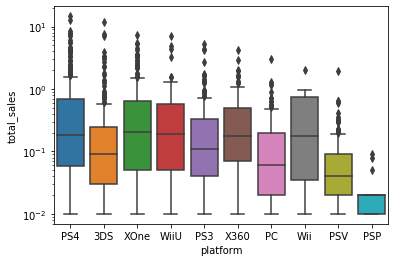

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dates_downsized, x ='platform', y='total_sales' )
plt.yscale('log')
print(dates_downsized.groupby(['platform']).name.count())

Text(0, 0.5, 'total sales')

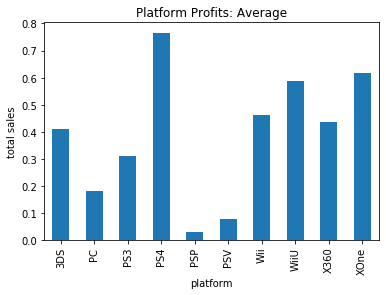

In [ ]:
dates_downsized.groupby(['platform']).total_sales.mean().plot(kind='bar')



plt.title('Platform Profits: Average')
plt.xlabel('')
plt.ylabel('total sales')


Text(0, 0.5, 'total sales')

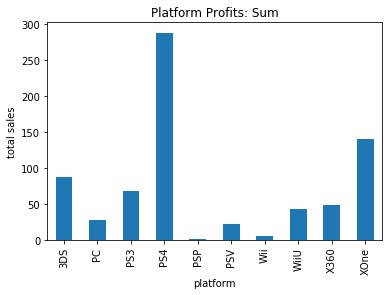

In [ ]:
dates_downsized.groupby(['platform']).total_sales.sum().plot(kind='bar')

plt.title('Platform Profits: Sum')
plt.xlabel('platform')
plt.ylabel('total sales')

##Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

* The box plot shows that sales per game are comparable between platforms but as shown in the histograms above (and in the total games per platform numbers), there is a significant variation in the number of games offered by each platform which result in much higher total sales between the platforms.  Overall, when you look at the total sum of sales the PS4 has much more sales than any of the other platform followed only by the XOne and the 3DS  

  

Correlation between critic_score and total_sales: 0.328105086966363


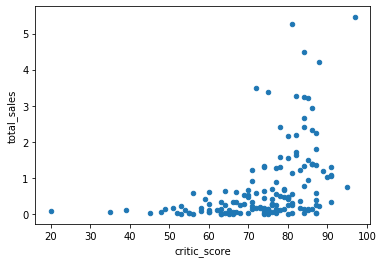

In [ ]:
##•	Take a look at how user and professional reviews affect sales for one popular platform (you choose).
##Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.


XOne_platform = dates_downsized[dates_downsized['platform'] == 'XOne']
XOne_platform.plot(x='critic_score', y='total_sales', kind='scatter')

print('Correlation between critic_score and total_sales:' ,dates_downsized['critic_score'].corr(dates_downsized['total_sales']))

Correlation between user_score and total_sales: -0.013070305002484562


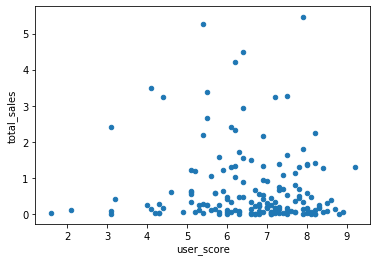

In [ ]:
XOne_platform = dates_downsized[dates_downsized['platform'] == 'XOne']
XOne_platform.plot(x='user_score', y='total_sales', kind='scatter')

print('Correlation between user_score and total_sales:' ,dates_downsized['user_score'].corr(dates_downsized['total_sales']))

### Conclusion  
* Initial results showed that there was a correlation between critic/user scores and the total sales of a game.  However, it was very slight.  Also, user scores seem to matter much less than critic scores.  

* However, after updating the data to only include information from 2014 onwards, the correlations changed a bit.  The correlation between critic scores and total sales changed to a positive correlation of 0.3 (from the previous calculation of 0.003) but the correlation between user scores and total sales changed to a negative correlation.  It's very slight; almost 0.  But it's still interesting because it means one has a negative impact on the other (even if just slightly).


In [ ]:
##•	Keeping your conclusions in mind, compare the sales of the same games on other platforms.

dates_downsized.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_numerical,genre_numerical,rating_numerical,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,,10,6,,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10,8,2,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,10,1,1,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,,10,6,,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,10,6,2,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,18,8,2,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,6,8,,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,15,8,2,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,6,8,,0.01


In [ ]:
filtered_games = dates_downsized.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.).groupby(['name', 'platform']).total_sales.sum().unstack(1)
filtered_games

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,
2014 FIFA World Cup Brazil,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,0.43,NaN
3rd Super Robot Wars Z Jigoku Hen,NaN,NaN,0.23,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,0.15,NaN,NaN,0.19,NaN,NaN,NaN,NaN
7 Days to Die,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.05
Adventure Time: Finn & Jake Investigations,0.09,NaN,0.08,0.10,NaN,NaN,NaN,0.05,0.09,0.05
...,...,...,...,...,...,...,...,...,...,...
Yakuza: Ishin,NaN,NaN,0.26,0.15,NaN,NaN,NaN,NaN,NaN,NaN
Yoru no Nai Kuni,NaN,NaN,0.05,0.08,NaN,0.08,NaN,NaN,NaN,NaN
Zero Escape: Zero Time Dilemma,0.08,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN


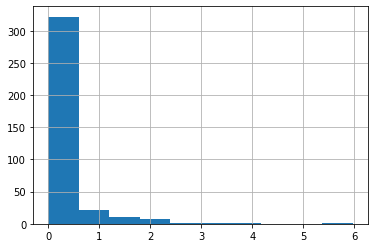

In [ ]:
filtered_games.std(1).hist(bins=10)


### Conclusion  
* As shown in the previous three charts, sales of games vary from platform to platform.  Using STD as an example, most of the
measures are close to 0 meaning that sales are quite similar.  Additionally, if you look above at the first chart, the game
Call of Duty: Black Ops 3 has a 3-million-dollar difference in sales between the PS4 and the X360 in NA and slight differences
across the other sale areas.  However, if you look at the column, total_sales, you will see that, ultimately, total_sales are virtually identical.


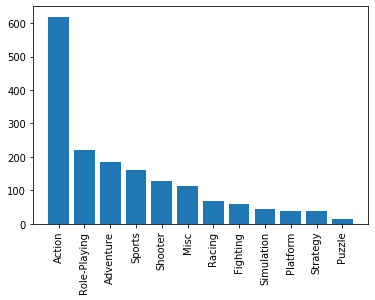

In [ ]:


genre_pop_variable = dates_downsized['genre'].value_counts()

genrepopularity = range(len(genre_pop_variable.index))


plt.bar(genrepopularity, genre_pop_variable,width=0.8, bottom=None, align='center')
plt.xticks(genrepopularity, genre_pop_variable.index, rotation='vertical')
plt.show()

In [ ]:
filtered_genres = dates_downsized.groupby(['genre']).filter(lambda x: x['platform'].count() >= 2.).groupby(['genre', 'platform']).total_sales.sum().unstack(1)
filtered_genres


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,
Action,22.06,5.34,18.10,91.62,0.20,7.47,1.19,9.99,12.33,31.06
Adventure,1.57,0.39,1.98,6.34,0.05,2.29,0.18,0.17,1.90,2.68
Fighting,8.10,0.10,2.89,7.73,NaN,0.69,NaN,5.88,0.66,2.17
Misc,3.85,0.05,6.69,7.77,0.02,3.43,3.14,4.59,1.27,6.74
Platform,3.98,0.06,0.76,5.42,NaN,0.19,NaN,6.87,0.19,0.62
Puzzle,0.87,NaN,0.04,0.02,NaN,0.06,NaN,1.22,NaN,NaN
Racing,NaN,0.64,1.00,10.16,NaN,0.10,NaN,7.09,1.64,6.89
Role-Playing,40.02,4.87,6.63,28.99,NaN,6.10,NaN,1.52,2.76,10.55
Shooter,NaN,5.79,12.17,78.46,NaN,0.64,NaN,4.83,13.66,55.39


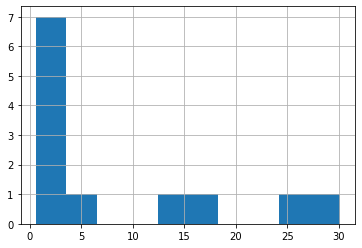

In [ ]:
filtered_genres.std(1).hist(bins=10)

In [ ]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

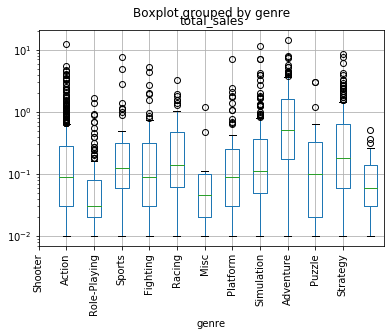

In [ ]:
unique_genres = dates_downsized['genre'].unique()
genre_range = range(len(unique_genres))

dates_downsized.boxplot(column="total_sales", by="genre", )
plt.xticks(genre_range, unique_genres, rotation='vertical')


plt.yscale('log')

### Conclusion  
* There does seem to be a big difference in profit based on genres with Action games making much more money than the other games.

### Section Conclusion  
* I began this section by looking at how many games had been released based on year and was able to see that the late 90s and early 2000s were a boom for the gaming industry that has tapered off since.

* I next compiled a list of the total sales based on each gaming platform, finding that PlayStation and MicrosoftX platforms were the most profitable overall.

* I then explored the top six platforms (and subsequently all 31 platforms) to determine what their lifespan/profitability period tended to be.  By doing this, I noticed that each system has a period of 5 to six years where their profits increased before dropping off over the next 4 to 5 years to virtually nothing.

* I also noted by reviewing this data that the new systems which emerged in the late 2000s and onward, have earned much less overall per year than did the systems of the late 90s and early 2000s which is consistent with the number of games released from 2010 onward (which have been decreasing).

* Next, based on this data, I initially downsized the data to only include games from 2005 onward (I subsequently changed the code to include data from 2014 onward).  Additionally, as the life span of platforms ranges between 10 to 12 years on average, I opted to take the middle ground of 11 years and used data from 2005 onward.

* Then I checked each platform's profitability as of 2016.  None of them grew in profitability; all were on the decline.  

* I next checked to see if there were significant differences in the sales of games based on platform using the 2005 timeframe mentioned above. Overall, based on that time frame, the most profitable platforms were still the PlayStation systems and the Microsoft X systems followed closely by the Nintendo Wii systems.  However, after updating the data to only include the years 2014-2016, the Play Station and Microsoft X systems remained the most profitable, but they were followed by the Nintendo 3DS this time.  

* Then, using the original 2005 timeframe, I checked to see if critic or user scores impacted profits and neither really had much of an impact.  Critic scores had bit more of an impact but not much.  Then, when I used the updated timeframe, the results of the correlation tests changed. The correlation between critic scores and total sales changed to a positive correlation of circa 0.3 (from the previous calculation of 0.003) but the correlation between user scores and total sales changed to a negative correlation. It’s very slight; almost 0. But it's still interesting because it means one has a negative impact on the other (even if just slightly).

* Then I compared the profits made by games that were sold on multiple platforms to see if there were significant differences in profit between the platforms -- there were not.  

* Finally, I checked profitability across genres.  I did find a big difference between the profitability of Action games versus all the other games.
  


## Step 4. Create a user profile for each region

In [ ]:
##•	The top five platforms. Describe variations in their market shares from region to region

platform_sales = dates_downsized.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
platform_sales

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,22.64,16.12,44.24,3.68
PC,7.23,17.97,0.00,1.85
PS3,22.05,25.54,11.22,9.37
PS4,98.61,130.04,15.02,44.48
PSP,0.00,0.00,0.36,0.00
PSV,2.52,3.53,14.54,1.81
Wii,2.08,2.59,0.00,0.40
WiiU,19.36,13.15,7.31,3.16
X360,28.30,15.49,0.08,4.35


In [ ]:
platform_sales.na_sales.nlargest(5)

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [ ]:
platform_sales.eu_sales.nlargest(5)

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [ ]:
platform_sales.jp_sales.nlargest(5)

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

### Conclusion  
* Analysis Based on the 2005 Timeframe
  * While the X360 is popular both in NA and the EU, it is not one of the top five platforms in JP.  Moreover, its popularity, i.e., profits are close to double in NA as opposed to the EU.

  * PlayStation games are popular across all three areas.  However, the particular PlayStation platform varies.  In NA, the PS2 and PS3 are more popular.  And in the EU, it's the PS3 and PS4 that are the most profitable.  Finally, in JP it's the PS3 and the PSP that are the most popular.

  * What's more interesting is the fact that in JP, three of the most popular gaming platforms are handheld platforms, i.e., the Nintendo DS, Nintendo 3DS and the PlayStation PSP.  In NA and the EU, the Nintendo DS is also popular but overall, the home gaming systems are more popular there.

  * Additionally, the sales/profits from platforms that are considered most popular in all the areas are much smaller in the EU and JP.  Based on the top five gaming platforms for each area, total sales from NA are twice that as in the EU and three times that as in JP.  

* Updated Analysis Based on the 2014 timeframe
  * With the update in time frame some of the data changed for the user profile.  To begin with, the X360 is no longer one of the top five in EU -- it's only one of the top five in NA, with XOne being more popular in NA and the EU but not JP.

  * Also, PlayStation remained popular but in NA the most popular systems went from being the PS2 and PS3 to being the PS3 and the PS4. (PS3 and PS4 remained popular in the EU).  And in Japan, the most popular Play Station systems changed to the PS3, PS4 and PSV.

  * Interestingly, three of the most popular systems in Japan remained handheld systems, however, they changed to the WiiU, PSV and 3DS.

  * Also, another significant change was in the region of profitability.  Based on the top five gaming platforms per region, total sales in the EU and NA were much more similar in total than previously calculated and much higher than in JP.


In [ ]:
##top five genres

genrepop = dates_downsized.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
genrepop

,na_sales,eu_sales,jp_sales,other_sales
genre,,,,
Action,72.53,74.68,29.58,22.57
Adventure,5.64,6.49,3.60,1.82
Fighting,12.43,6.69,6.37,2.73
Misc,15.05,12.86,5.61,4.03
Platform,6.79,6.80,2.69,1.81
Puzzle,0.65,0.52,0.93,0.11
Racing,8.74,14.13,1.76,2.89
Role-Playing,33.47,28.17,31.16,8.64
Shooter,79.02,65.52,4.87,21.53


In [ ]:
genrepop.na_sales.nlargest(5)

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [ ]:
genrepop.eu_sales.nlargest(5)

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [ ]:
genrepop.jp_sales.nlargest(5)

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

### Conclusion  
* Analysis Based on the 2005 Timeframe
  * In general, the three regions have similar likes as far as genres go.  However, there is one area in which each region differs completely.  All have Action, Sports, and Misc as part of their top 5.  But NA and the EU both have Shooter games as a part of their top five and JP doesn't.  It ranks 9th in popularity in Japan.

  * Additionally, NA and JP both seem to prefer Role-Playing games, whereas the EU doesn't.  Racing is instead in their top five.

  * Japan also seems to prefer Platform games whereas NA and the EU do not.

  * Again, as was the case with gaming platforms, the amount of money spent in NA is substantially higher than in the EU and JP.

* Updated Analysis Based on the 2014 Timeframe

  * In general, the three regions still have similar likes as far as games go.  However, those 'likes' have changed a bit with the new calculations.  Currently, all three have Action, Sports and Role Playing in their top five (the EU didn't previously).  And JP now has Shooter games listed as one of its top five which it hadn't before.

  * Racing is still a part of the top five in the EU only.

  * Platform games have been replaced in Japan's top five by Fighting games.

  * Additionally, as was the case with profitability across platforms, the amount of money spent on games based upon genre is virtually equal in NA and the EU and much less in JP.


In [ ]:
##Ratings and sales

rating_sales = dates_downsized.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].sum()
rating_sales

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
,64.72,58.95,56.90,18.40
E,50.74,58.06,8.94,15.39
E10+,33.23,26.16,4.46,7.83
M,96.42,93.44,8.01,28.67
T,38.95,34.07,14.78,11.33


In [ ]:
rating_sales.na_sales.nlargest(5)

rating
M       96.42
        64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

In [ ]:
rating_sales.eu_sales.nlargest(5)

rating
M       93.44
        58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

In [ ]:
rating_sales.jp_sales.nlargest(5)

rating
        56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

### Conclusion  
* Analysis Based on the 2005 Timeframe
  * Ratings do seem to have an impact on sales in the various regions.  Games that are Rated E tend to bring in much more money than any of the other games.  In NA games that are rated E, bring in over 300 million dollars more than the next highest ranked game.  In the EU, E games bring in around 100 million dollars more.  

* Updated Analysis Based on the 2014 Timeframe  
  * With the new time frame, the game ratings that are the most profitable across the regions have changed.  Currently, in NA and the EU, games rated M are the most profitable, followed by games that are rated E.  And in Japan, games rated T have become more popular, followed by games rated E.


### Section Conclusion  
* Analysis Based on the 2005 Timeframe

  * In this section, I created user profiles for each region.

  * I started by comparing sales across the regions based on each platform.  X360 was the most profitable in NA.  The PS3 was the most profitable in the EU.  And 3DS was the most profitable in JP.   X360 didn't appear in the top 5 for JP at all even though it did for NA and the EU.

  * PlayStation games were profitable across all three regions.  However, the particular PlayStation platform varied. In NA, the PS2 and PS3 were more popular. And in the EU, the PS3 and PS4 were the most profitable. Finally, in JP the PS3 and the PSP were the most popular.

  * What's more interesting is the fact that in JP, three of the most popular gaming platforms were handheld platforms, i.e., the Nintendo DS, Nintendo 3DS and the PlayStation PSP. In NA and the EU, the Nintendo DS was also popular but overall, the home gaming systems were more popular there.

  * Additionally, the sales/profits from platforms that were considered most popular in all the areas were much smaller in the EU and JP. Based on the top five gaming platforms for each area, total sales from NA were twice that as in the EU and three times that of JP.

  * I then checked to see which genres were most profitable in each region. In general, the three regions had similar likes as far as genres go. However, there is one area in which each region differed completely. All had Action, Sports, and Misc as part of their top 5. But NA and the EU both had Shooter games as a part of their top five and JP didn’t. It ranked 9th in popularity in Japan.

    * Additionally, NA and JP both seemed to prefer Role-Playing games, whereas the EU didn’t. Racing was instead in their top five.
Japan also seemed to prefer Platform games whereas NA and the EU did not.

  * Again, as was the case with gaming platforms, the amount of money spent in NA was substantially higher than in the EU and JP.

  * Finally, I checked to see which game ratings were the most profitable across the regions. Games that are Rated E tended to bring in much more money than any of the other games. In NA games that are rated E, brought in over 300 million dollars more than the next highest ranked game. In the EU, E games, brought in around 100 million dollars more.  

* Updated Analysis Based on the 2014 Timeframe
    
  * With the updated timeframe some of the data changed for the user profile. To begin with, the X360 was no longer one of the top five in the EU --- it was only one of the top five in NA, with XOne being more popular in NA and the EU but not JP.

  * Also, Play Station remained popular, but in NA, the most popular systems went from being the PS2 and PS3 to being the PS3 and the PS4. (PS3 and PS4 remained popular in the EU). And in Japan, the most popular PlayStation systems changed to the PS3, PS4 and PSV.

  * Interestingly, three of the most popular systems in Japan remained handheld systems, however, they changed to the WiiU, PSV and 3DS.

  * Also, another significant change was in the region of profitability. Based on the top five gaming platforms per region, total sales in the EU and NA were much more similar in total than previously calculated and much higher than in JP.


  * In general, the three regions still had similar likes as far as genres go. However, those 'likes' changed a bit with the new calculations. All three had Action, Sports and Role Playing in their top five (the EU didn't previously). And JP now had Shooter games listed as one of its top five which it hadn't before.

  * Racing was still a part of the top five in the EU only.

  * Platform games had been replaced in Japan's top five by Fighting games.

  * Additionally, as was the case with profitability across platforms, the amount of money spent on games based upon genre was virtually equal in NA and the EU and much less in JP.

  * With the new time frame, the game ratings that were the most profitable across the regions changed.  In NA and the EU, games rated M were the most profitable, followed by games that are rated E.  And in Japan, games rated T had become more popular, followed by games rated E.



## Step 5. Test the following hypotheses:

In [ ]:
print(dates_downsized[dates_downsized.platform=='XOne'].user_score.mean())
print(dates_downsized[dates_downsized.platform=='PC'].user_score.mean())

6.594545454545454
6.298360655737704


In [ ]:
##Average user ratings of the Xbox One and PC platforms are the same

dates_downsized.groupby('platform').user_score.describe().loc[['XOne', 'PC']]
st.ttest_ind(dates_downsized[dates_downsized.platform=='XOne'].user_score.dropna(), dates_downsized[dates_downsized.platform=='PC'].user_score.dropna())

Ttest_indResult(statistic=1.6285882029651313, pvalue=0.10450507919348415)

In [ ]:
alpha = .05

results = st.ttest_ind(dates_downsized[dates_downsized.platform=='XOne'].user_score.dropna(), dates_downsized[dates_downsized.platform=='PC'].user_score.dropna())
print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("Average user ratings of the Xbox One and PC platforms are not the same")
else:
        print("Average user ratings of the Xbox One and PC platforms are the same")

p-value:  0.10450507919348415
Average user ratings of the Xbox One and PC platforms are the same


In [ ]:
print(dates_downsized[dates_downsized.genre=='Action'].user_score.mean())
print(dates_downsized[dates_downsized.genre=='Sports'].user_score.mean())


6.760606060606061
5.225196850393701


In [ ]:
##Average user ratings for the Action and Sports genres are different.

dates_downsized.groupby('genre').user_score.describe().loc[['Action', 'Sports']]
st.ttest_ind(dates_downsized[dates_downsized.genre=='Action'].user_score.dropna(), dates_downsized[dates_downsized.genre=='Sports'].user_score.dropna())

Ttest_indResult(statistic=9.425173048948047, pvalue=2.8711147985105864e-19)

In [ ]:
alpha = .05

results = st.ttest_ind(dates_downsized[dates_downsized.genre=='Action'].user_score.dropna(), dates_downsized[dates_downsized.genre=='Sports'].user_score.dropna())
print('p-value: ', results.pvalue)

alpha = 0.05
if (results.pvalue < alpha):
        print("Average user ratings for the Action and Sports genres are not different")
else:
        print("Average user ratings for the Action and Sports genres are different")

p-value:  2.8711147985105864e-19
Average user ratings for the Action and Sports genres are not different


### Conclusion  
* Analysis Based on 2005 Timeframe  
  * There wasn't a statistical difference between the user ratings of the X360 and the PC.  The mean for the PC user rating was 0.3 higher only.  Also, the average user ratings weren't statistically different between the genres of Action and Sports, the mean for the Action genre being 0.4 higher.  

* Updated Analysis Based on the 2014 Timeframe
  * There wasn't a statistical difference between the user ratings of the X360 and the PC.  And the difference in the ratings between the genres of Action and Sports aren't considered to be statistically significant.


### Overall Conclusion  
* Analysis Based on the 2005 Timeframe
  * In general, based upon the above analysis, it would be more beneficial/profitable for Ice to spend more money promoting either new or newer platforms (platforms that are 4 years old or less).

  * It would also be more beneficial if they promoted Action and Sports games overall, as well as Shooter games in NA and the EU and role-playing games in Japan.

  * Also, in general, it would potentially be more profitable if Ice were to market more heavily in NA as they tend to spend double the amount of money on gaming.

* Updated Analysis Based on the 2014 Timeframe

  * In general, it would still be more beneficial/profitable for Ice to spend more money promoting either new or newer platforms (platforms that are 4 years old or less).

  * It would also still be more beneficial if they promoted Action and Sports games overall, as well as Shooter games and Role Play games in general.

  * Based on the new data, it would also potentially be more profitable for Ice to market more heavily in NA and the EU as their total sales are quite similar.


